In [2]:
!pip install spotipy

  Using cached spotipy-2.20.0-py3-none-any.whl (27 kB)
  Using cached redis-4.3.4-py3-none-any.whl (246 kB)
  Using cached Deprecated-1.2.13-py2.py3-none-any.whl (9.6 kB)
  Using cached async_timeout-4.0.2-py3-none-any.whl (5.8 kB)


In [2]:
import time

import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
from math import dist
from sklearn import preprocessing
import random
import numpy as np

In [21]:
# spotifyから特定のアーティストの曲を取得
lz_uri = (
    "https://open.spotify.com/artist/7kZTWx6cRLc0TSRPq1XBMP?si=idBI01jeS2C1KMOohTbf0A"
)

my_id = "18308f0d5b8049c89ee330d9cfa4bc58"  # client ID
my_secret = "eff59f147eac4c8db8a9f190336aa548"  # client secret
ccm = SpotifyClientCredentials(client_id=my_id, client_secret=my_secret)
spotify = spotipy.Spotify(client_credentials_manager=ccm)
results = spotify.artist_top_tracks(lz_uri)
#print(results)
for track in results["tracks"][:5]:
    print("track    : " + track["name"])
    print("audio    : " + track["preview_url"])
    print("cover art: " + track["album"]["images"][0]["url"])
    print("url      : " + track['external_urls']['spotify'])
    print()

track    : Ghost Rule
audio    : https://p.scdn.co/mp3-preview/f168b575170267c821082adcf6642ae60f68b4c8?cid=18308f0d5b8049c89ee330d9cfa4bc58
cover art: https://i.scdn.co/image/ab67616d0000b27353df6ca4428a5e515f8f0a90
url      : https://open.spotify.com/track/1OAp6qN5KmoGUQ2edICKsC

track    : サラマンダー
audio    : https://p.scdn.co/mp3-preview/d7ed7912d027ce34cf45e42bd5e4d123d82ae3c6?cid=18308f0d5b8049c89ee330d9cfa4bc58
cover art: https://i.scdn.co/image/ab67616d0000b273ffe33cd03d4ce1622cfab60a
url      : https://open.spotify.com/track/64LMCa7fkdfHYLtCm0kGTR

track    : The Vampire
audio    : https://p.scdn.co/mp3-preview/c9c08e9339a0b9a892fdd45f738657038a261a21?cid=18308f0d5b8049c89ee330d9cfa4bc58
cover art: https://i.scdn.co/image/ab67616d0000b27321d516ba3ba52cc1f9acd784
url      : https://open.spotify.com/track/2d49lHO5ybKcYAcuJh2hT2

track    : ヒバナ -Reloaded-
audio    : https://p.scdn.co/mp3-preview/30c65963c888d4fe5a62119200cf34e422bf021b?cid=18308f0d5b8049c89ee330d9cfa4bc58
cover art

In [10]:
# spotify developerから取得したclient_idとclient_secretを入力
client_id = "18308f0d5b8049c89ee330d9cfa4bc58"  # client ID
client_secret = "eff59f147eac4c8db8a9f190336aa548"  # client secret

client_credentials_manager = SpotifyClientCredentials(client_id, client_secret)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager, language='ja')

In [4]:
# プレイリスト内の楽曲idをすべて取得する関数
def getTrackIDs(playlist_ids): # 引数はプレイリストのid
    track_ids = []

    for playlist_id in playlist_ids:
        playlist = sp.playlist(playlist_id)
        while playlist["tracks"]["next"]:
            for item in playlist["tracks"]["items"]:
                track = item["track"]
                if not track["id"] in track_ids:
                    track_ids.append(track["id"])
            playlist["tracks"] = sp.next(playlist["tracks"])
        else:
            for item in playlist["tracks"]["items"]:
                track = item["track"]
                if not track["id"] in track_ids:
                    track_ids.append(track["id"])

    return track_ids

In [5]:
# 楽曲ごとのデータを取得
def getTrackFeatures(id): # 引数は楽曲のid
    meta = sp.track(id)
    features = sp.audio_features(id)

    name = meta["name"]
    album = meta["album"]["name"]
    artist = meta["album"]["artists"][0]["name"]
    release_date = meta["album"]["release_date"]
    length = meta["duration_ms"]
    popularity = meta["popularity"]
    key = features[0]["key"]
    mode = features[0]["mode"]
    danceability = features[0]["danceability"]
    acousticness = features[0]["acousticness"]
    energy = features[0]["energy"]
    instrumentalness = features[0]["instrumentalness"]
    liveness = features[0]["liveness"]
    loudness = features[0]["loudness"]
    speechiness = features[0]["speechiness"]
    tempo = features[0]["tempo"]
    time_signature = features[0]["time_signature"]
    valence = features[0]["valence"]

    track = [name,album,artist,release_date,length,popularity,key,mode,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence,]
    return track

In [6]:
# SpotifyのプレイリストのIDを入力(複数でも可能)(複数の場合、楽曲の重複は許さない)
playlist_ids = ["37i9dQZEVXbKqiTGXuCOsB?si=5da983776b934feb"] # 週間トップソング-日本(50曲)
track_ids = getTrackIDs(playlist_ids)
print(len(track_ids))
print(track_ids)

50
['28MATCYDctW5EiBa2repxb', '4IfrM44LofE9bSs6TDZS49', '4NaaF28BeO9WzjDrSS71Nz', '60ReNXcPcsVFd7nUuQw5HZ', '2uMNMcjjUz8oNIxjIu20qE', '1Vqs0lXeJafYZz2sxnfB3V', '4JK1kDUdH9RTBQrrSO1QfR', '78MS9OT9Flm2V78fhTw4rk', '2wRKOmpe6I7q6k69bkjuFU', '1VHL1PIkhDwWbFc65xHwOr', '34PR0zLBVl7VMF9E7dDwdo', '5rJ7bdPmr8nfmm2JQ8xHOz', '4Y0chGCyYIRpdUqHJjndF7', '5W7Y92LB4jWvu9NeEQ0GZl', '5YQNjKZofFhlBCIzTVY6rW', '4kPlQKwtPrnqLgrmmKFSlA', '5m1i6hq7dmRlp3c1utE48L', '5QDLhrAOJJdNAmCTJ8xMyW', '4OelNEcxPGoCOU29fchcsv', '3IhHrBYZaxySuRu1zI7Vuk', '0J0P8iSE6l3pYHbUdNFYdS', '19mjCzLuMHZ0Tyn3eI85bo', '1zd35Y44Blc1CwwVbW3Qnk', '2IL2asrtx7XM1y8fu2RMnR', '51oc6MEsXTpnPn6GOw5VuP', '7v8wKvNQQIxkugCFFjrkaO', '0mBP9X2gPCuapvpZ7TGDk3', '6jjYDGxVJsWS0a5wlVF5vS', '6MCjmGYlw6mQVWRFVgBRvB', '0zfNtgPJ5FLkbveRjSdCMb', '2mRMcwDCNyYvBXaoUxmsmE', '6IO5nn84TKArsi3cjpIqaD', '6ZiEWet0uFRwWBCEKCQ8rY', '3XYRV7ZSHqIRDG87DKTtry', '0Q5VnK2DYzRyfqQRJuUtvi', '0l2wnmSJ8rW5dvS2eW3xNp', '3PK5ERLCyMuQ5Cb89GbZVL', '5PjdY0CKGZdEuoNab3yDmX', '3Itdlob

In [11]:
tracks = [] # 楽曲を格納するリスト

for track_id in track_ids:
    track = getTrackFeatures(track_id)
    tracks.append(track)
    
df = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'key', 'mode', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'valence'])
df.head()

,name,album,artist,release_date,length,popularity,key,mode,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
0,新時代,ウタの歌 ONE PIECE FILM RED,Ado,2022-08-09,226813,65,7,1,0.490,0.0490,0.987,0.000003,0.4060,-2.279,0.2530,175.064,4,0.451
1,W / X / Y,Memories,Tani Yuuki,2021-12-08,278118,74,2,1,0.628,0.1590,0.775,0.000000,0.3300,-4.479,0.0535,106.382,3,0.674
2,ダンスホール,ダンスホール,Mrs. GREEN APPLE,2022-05-23,203149,75,7,1,0.736,0.0209,0.695,0.000000,0.0517,-3.870,0.0468,109.976,4,0.784
3,ミックスナッツ,ミックスナッツ,Official髭男dism,2022-04-15,213438,75,6,1,0.542,0.0101,0.918,0.000000,0.2590,-5.074,0.0937,150.094,4,0.784
4,Habit,Habit,SEKAI NO OWARI,2022-04-28,253153,77,10,0,0.749,0.2030,0.850,0.000000,0.1800,-5.390,0.1260,117.968,4,0.912


In [12]:
df.to_csv('spotify_data_JP_famous.csv', sep = ',', encoding='utf_8_sig')

In [13]:
df1 = pd.read_csv('spotify_data_JP_famous.csv')
df1.head()

,Unnamed: 0,name,album,artist,release_date,length,popularity,key,mode,danceability,acousticness,energy,instrumentalness,liveness,loudness,speechiness,tempo,time_signature,valence
0,0,新時代,ウタの歌 ONE PIECE FILM RED,Ado,2022-08-09,226813,65,7,1,0.490,0.0490,0.987,0.000003,0.4060,-2.279,0.2530,175.064,4,0.451
1,1,W / X / Y,Memories,Tani Yuuki,2021-12-08,278118,74,2,1,0.628,0.1590,0.775,0.000000,0.3300,-4.479,0.0535,106.382,3,0.674
2,2,ダンスホール,ダンスホール,Mrs. GREEN APPLE,2022-05-23,203149,75,7,1,0.736,0.0209,0.695,0.000000,0.0517,-3.870,0.0468,109.976,4,0.784
3,3,ミックスナッツ,ミックスナッツ,Official髭男dism,2022-04-15,213438,75,6,1,0.542,0.0101,0.918,0.000000,0.2590,-5.074,0.0937,150.094,4,0.784
4,4,Habit,Habit,SEKAI NO OWARI,2022-04-28,253153,77,10,0,0.749,0.2030,0.850,0.000000,0.1800,-5.390,0.1260,117.968,4,0.912


In [16]:
df1 = df1[['name', 'artist', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'energy', 'loudness', 'tempo',  'valence']]
df1["loudness"]=df1["loudness"].abs()
# 正規化したデータを保存する
mm = preprocessing.MinMaxScaler()
df1_mm=df1[['length', 'popularity', 'danceability', 'acousticness', 'energy', 'loudness', 'tempo',  'valence']]
df1_mm = mm.fit_transform(df1_mm)
df1_mm = pd.DataFrame(df1_mm, columns=['length', 'popularity', 'danceability', 'acousticness', 'energy', 'loudness', 'tempo',  'valence'])
df1_mm.insert(0, "release_date", df1["release_date"])
df1_mm.insert(0, "artist", df1["artist"])
df1_mm.insert(0, "name", df1["name"])
df1_mm.to_csv('spotify_data_JP_famous_mm.csv', sep = ',', encoding='utf_8_sig')
df1_mm

,name,artist,release_date,length,popularity,danceability,acousticness,energy,loudness,tempo,valence
0,新時代,Ado,2022-08-09,0.459411,0.608108,0.422452,0.063067,1.000000,0.113263,0.802677,0.272871
1,W / X / Y,Tani Yuuki,2021-12-08,0.736680,0.729730,0.626292,0.204831,0.687316,0.490233,0.257742,0.624606
2,ダンスホール,Mrs. GREEN APPLE,2022-05-23,0.331523,0.743243,0.785820,0.026853,0.569322,0.385881,0.286257,0.798107
3,ミックスナッツ,Official髭男dism,2022-04-15,0.387128,0.743243,0.499261,0.012934,0.898230,0.592186,0.604561,0.798107
4,Habit,SEKAI NO OWARI,2022-04-28,0.601761,0.770270,0.805022,0.261537,0.797935,0.646333,0.349667,1.000000
5,シンデレラボーイ,Saucy Dog,2021-08-25,0.499997,0.743243,0.579025,0.096317,0.628319,0.812886,0.271420,0.388013
6,ベテルギウス,優里,2022-01-12,0.479877,0.716216,0.240768,0.286024,0.533923,0.511652,0.840515,0.651420
7,逆光,Ado,2022-08-09,0.518064,0.594595,0.531758,0.000416,0.865782,0.386737,0.564326,0.686120
8,エジソン,水曜日のカンパネラ,2022-05-25,0.279431,0.689189,0.936484,0.025048,0.619469,0.705106,0.445123,0.537855
9,愛とか恋とか,Novelbright,2022-05-16,0.489891,0.675676,0.728213,0.899476,0.364307,0.594757,0.127661,0.198738


In [49]:
def playlist(ID,name):
    # SpotifyのプレイリストのIDを入力(複数でも可能)(複数の場合、楽曲の重複は許さない)
    playlist_ids = ID
    track_ids = getTrackIDs(playlist_ids)

    tracks = [] # 楽曲を格納するリスト

    for track_id in track_ids:
        track = getTrackFeatures(track_id)
        tracks.append(track)
    
    df = pd.DataFrame(tracks, columns = ['name', 'album', 'artist', 'release_date', 'length', 'popularity', 'key', 'mode', 'danceability', 'acousticness', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'time_signature', 'valence'])
    df.to_csv(name, sep = ',', encoding='utf_8_sig')

In [50]:
ID=["4zg739VKrRbD5z3Xj4yjgz?si=5afd6be8eeb547c6"]
playlist(ID,'spotify_data_vocaloid.csv')

In [159]:
df2 = pd.read_csv('spotify_data_vocaloid.csv')
df2 = df2[['name', 'artist', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'energy', 'loudness', 'tempo',  'valence']]
df2["loudness"]=df2["loudness"].abs()
df2

,name,artist,release_date,length,popularity,danceability,acousticness,energy,loudness,tempo,valence
0,シャルル,バルーン,2017-08-12,233875,54,0.517,0.0239,0.848,2.971,144.938,0.577
1,フォニイ,ヴァリアス・アーティスト,2021-12-18,189884,61,0.624,0.0724,0.897,6.651,169.903,0.609
2,KING,Kanaria,2020-08-01,134750,54,0.579,0.0486,0.784,6.002,166.013,0.924
3,ヴァンパイア,DECO*27,2021-03-09,178235,58,0.555,0.0096,0.955,4.073,164.028,0.955
4,神っぽいな,ピノキオピー,2021-09-19,203760,60,0.652,0.2460,0.811,7.125,142.046,0.538
...,...,...,...,...,...,...,...,...,...,...,...
95,ハッピーシンセサイザ,EasyPop,2015-09-01,236581,48,0.621,0.0354,0.940,2.298,126.993,0.943
96,お気に召すまま,Eve,2017-12-20,246712,50,0.607,0.0496,0.841,1.704,142.989,0.822
97,ワールズエンド・ダンスホール(ROCKETMAN remix),ヴァリアス・アーティスト,2011-12-07,279726,38,0.481,0.0024,0.916,2.910,171.070,0.610
98,Calc.,伊東歌詞太郎,2014-01-22,226184,38,0.280,0.0016,0.931,2.225,173.102,0.424


In [66]:
# 楽曲をリコメンドする関数
def music_recommend():
    print("最新の日本の週間トップソング(1番)とボカロ100選(2番)どっちがいいですか?")
    ans1=int(input())
    if ans1==1:
        df3 = pd.read_csv('spotify_data_JP_famous.csv')
        df3 = df3[['name', 'artist', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'energy', 'loudness', 'tempo',  'valence']]
    else:
        df3 = pd.read_csv('spotify_data_vocaloid.csv')
        df3 = df3[['name', 'artist', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'energy', 'loudness', 'tempo',  'valence']]
    
    ans=[]
    print("踊れる曲かどうか(0～1)")
    ans.append(float(input()))
    print("テンポは?(40-200bpm)")
    ans.append(float(input()))
    print("悲観的(0)～楽観的(1)")
    ans.append(float(input()))
    
    min_point=10000
    for i in range(len(df3)):
        point=pow(df3.values[i][5]-ans[0],2)+pow(df3.values[i][9]-ans[1],2)+pow(df3.values[i][5]-ans[2],2)
        if point<min_point:
            min_point_name=df3.values[i][0]
            
    print("あなたにおすすめの曲は", min_point_name, "です。")
        
music_recommend()

最新の日本の週間トップソング(1番)とボカロ100選(2番)どっちがいいですか?


 2


踊れる曲かどうか(0～1)


 0.6


テンポは?(40-200bpm)


 160


悲観的(0)～楽観的(1)


 0.7


あなたにおすすめの曲は ナンセンス文学 です。


<Figure size 432x288 with 0 Axes>

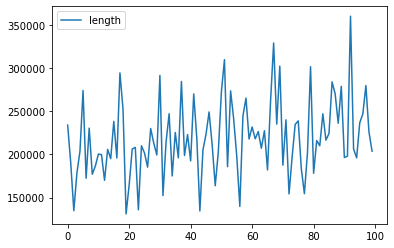

<Figure size 432x288 with 0 Axes>

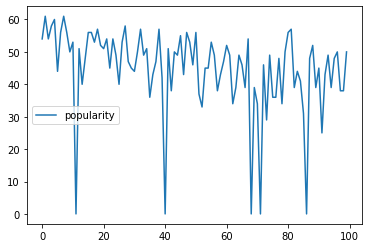

<Figure size 432x288 with 0 Axes>

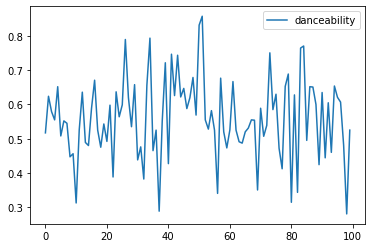

<Figure size 432x288 with 0 Axes>

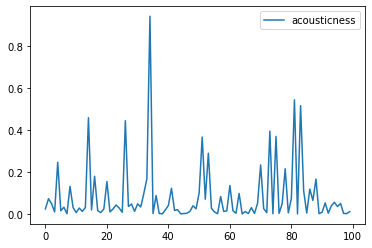

<Figure size 432x288 with 0 Axes>

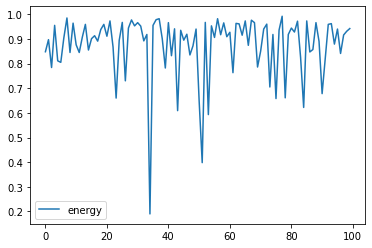

<Figure size 432x288 with 0 Axes>

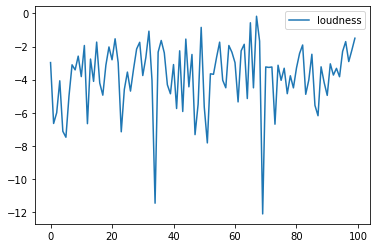

<Figure size 432x288 with 0 Axes>

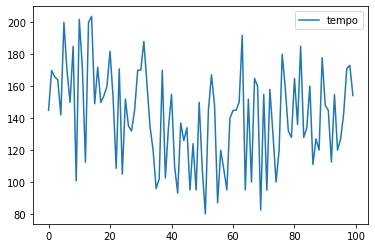

<Figure size 432x288 with 0 Axes>

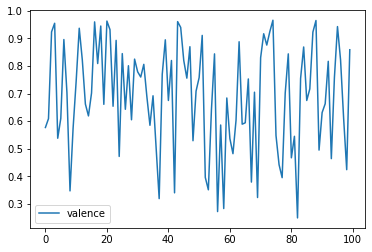

In [59]:
Y=['length', 'popularity', 'danceability', 'acousticness', 'energy', 'loudness', 'tempo',  'valence']
for data in Y:
    df2 = pd.read_csv('spotify_data_vocaloid.csv')
    df2 = df2[[data]]
    plt.figure()
    df2.plot()

In [96]:
# 標準化してみる
sc = StandardScaler()
df2_sc=df2[['length', 'popularity', 'danceability', 'acousticness', 'energy', 'loudness', 'tempo',  'valence']]
df2_sc = sc.fit_transform(df2_sc)
df2_sc = pd.DataFrame(df2_sc, columns=['length', 'popularity', 'danceability', 'acousticness', 'energy', 'loudness', 'tempo',  'valence'])
df2_sc.insert(0, "name", df2["name"])
df2_sc

,name,length,popularity,danceability,acousticness,energy,loudness,tempo,valence
0,シャルル,0.348861,0.726789,-0.366373,-0.408399,-0.218001,0.407089,0.113885,-0.597756
1,フォニイ,-0.661219,1.276198,0.543817,-0.075342,0.170437,-1.437073,0.951392,-0.430302
2,KING,-1.927154,0.726789,0.161027,-0.238780,-0.725349,-1.111839,0.820894,1.218065
3,ヴァンパイア,-0.928692,1.040737,-0.043128,-0.506599,0.630221,-0.145158,0.754302,1.380286
4,神っぽいな,-0.342611,1.197711,0.781998,1.116797,-0.511311,-1.674609,0.016867,-0.801839
...,...,...,...,...,...,...,...,...,...
95,ハッピーシンセサイザ,0.410994,0.255867,0.518298,-0.329426,0.511311,0.744350,-0.488120,1.317491
96,お気に召すまま,0.643612,0.412841,0.399208,-0.231913,-0.273492,1.042022,0.048502,0.684308
97,ワールズエンド・ダンスホール(ROCKETMAN remix),1.401648,-0.529002,-0.672605,-0.556043,0.321056,0.437658,0.990542,-0.425070
98,Calc.,0.172268,-0.529002,-2.382402,-0.561536,0.439966,0.780932,1.058710,-1.398391


<Figure size 432x288 with 0 Axes>

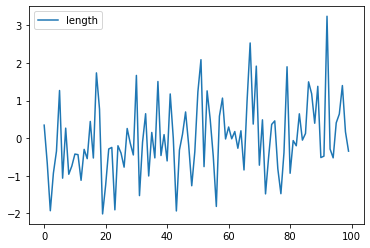

<Figure size 432x288 with 0 Axes>

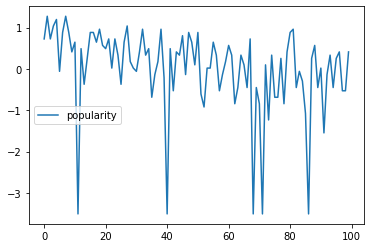

<Figure size 432x288 with 0 Axes>

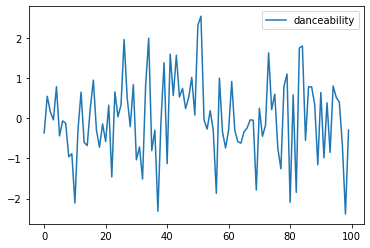

<Figure size 432x288 with 0 Axes>

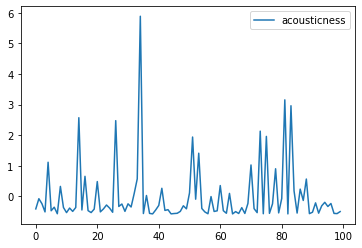

<Figure size 432x288 with 0 Axes>

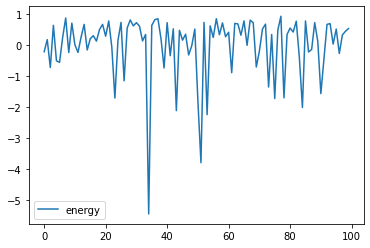

<Figure size 432x288 with 0 Axes>

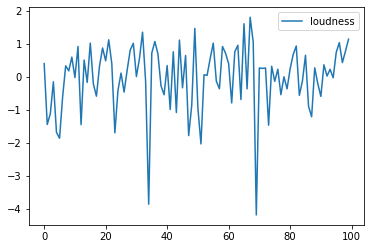

<Figure size 432x288 with 0 Axes>

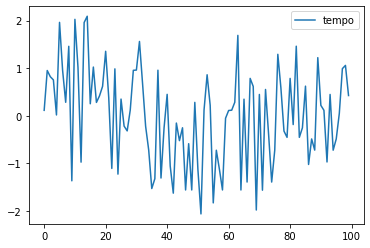

<Figure size 432x288 with 0 Axes>

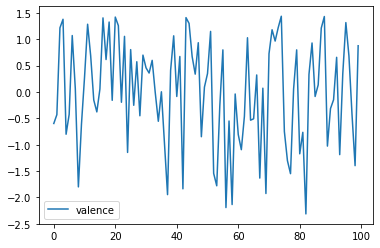

In [93]:
Y=['length', 'popularity', 'danceability', 'acousticness', 'energy', 'loudness', 'tempo',  'valence']
for data in Y:
    df2_graph = df2_sc[[data]]
    plt.figure()
    df2_graph.plot()

In [161]:
# 正規化してみる
mm = preprocessing.MinMaxScaler()
df2_mm=df2[['length', 'popularity', 'danceability', 'acousticness', 'energy', 'loudness', 'tempo',  'valence']]
df2_mm = mm.fit_transform(df2_mm)
df2_mm = pd.DataFrame(df2_mm, columns=['length', 'popularity', 'danceability', 'acousticness', 'energy', 'loudness', 'tempo',  'valence'])
df2_mm.insert(0, "name", df2["name"])
df2_mm

,name,length,popularity,danceability,acousticness,energy,loudness,tempo,valence
0,シャルル,0.449087,0.885246,0.410035,0.025380,0.820449,0.234368,0.523993,0.457462
1,フォニイ,0.256934,1.000000,0.595156,0.076922,0.881546,0.542396,0.725466,0.502092
2,KING,0.016109,0.885246,0.517301,0.051630,0.740648,0.488072,0.694073,0.941423
3,ヴァンパイア,0.206051,0.950820,0.475779,0.010184,0.953865,0.326609,0.678054,0.984658
4,神っぽいな,0.317544,0.983607,0.643599,0.261410,0.774314,0.582071,0.500654,0.403068
...,...,...,...,...,...,...,...,...,...
95,ハッピーシンセサイザ,0.460906,0.786885,0.589965,0.037602,0.935162,0.178036,0.379172,0.967922
96,お気に召すまま,0.505159,0.819672,0.565744,0.052692,0.811721,0.128317,0.508264,0.799163
97,ワールズエンド・ダンスホール(ROCKETMAN remix),0.649364,0.622951,0.347751,0.002532,0.905237,0.229263,0.734884,0.503487
98,Calc.,0.415492,0.622951,0.000000,0.001682,0.923940,0.171926,0.751283,0.244073


<Figure size 432x288 with 0 Axes>

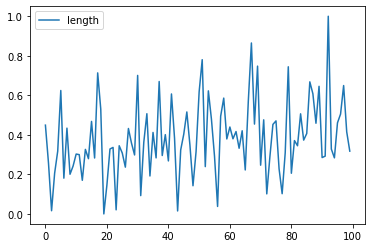

<Figure size 432x288 with 0 Axes>

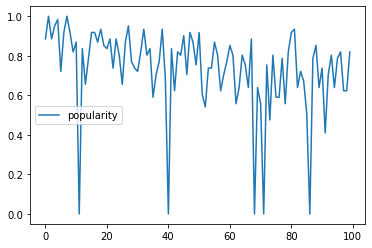

<Figure size 432x288 with 0 Axes>

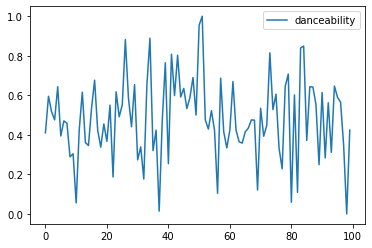

<Figure size 432x288 with 0 Axes>

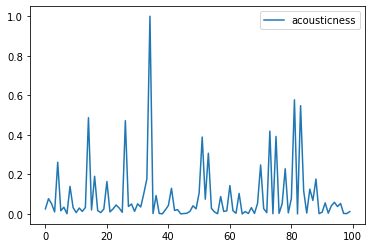

<Figure size 432x288 with 0 Axes>

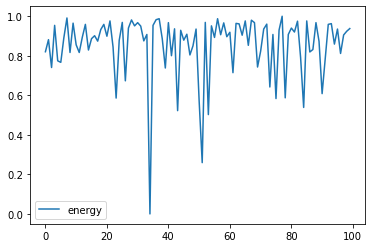

<Figure size 432x288 with 0 Axes>

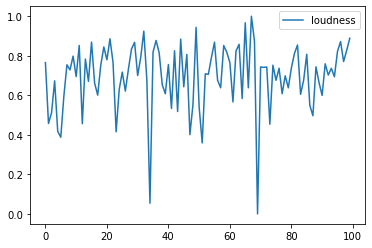

<Figure size 432x288 with 0 Axes>

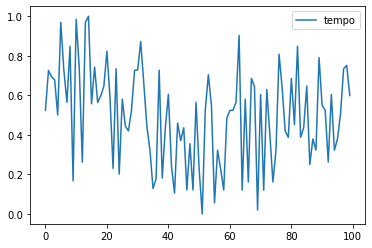

<Figure size 432x288 with 0 Axes>

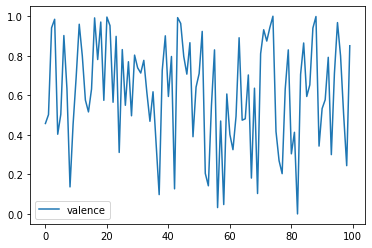

In [100]:
Y=['length', 'popularity', 'danceability', 'acousticness', 'energy', 'loudness', 'tempo',  'valence']
for data in Y:
    df2_mm_graph = df2_mm[[data]]
    plt.figure()
    df2_mm_graph.plot()

In [167]:
# 正規化したデータを保存する
mm = preprocessing.MinMaxScaler()
df2_mm=df2[['length', 'popularity', 'danceability', 'acousticness', 'energy', 'loudness', 'tempo',  'valence']]
df2_mm = mm.fit_transform(df2_mm)
df2_mm = pd.DataFrame(df2_mm, columns=['length', 'popularity', 'danceability', 'acousticness', 'energy', 'loudness', 'tempo',  'valence'])
df2_mm.insert(0, "release_date", df2["release_date"])
df2_mm.insert(0, "artist", df2["artist"])
df2_mm.insert(0, "name", df2["name"])
df2_mm.to_csv('spotify_data_vocaloid_mm.csv', sep = ',', encoding='utf_8_sig')
df2_mm

,name,artist,release_date,length,popularity,danceability,acousticness,energy,loudness,tempo,valence
0,シャルル,バルーン,2017-08-12,0.449087,0.885246,0.410035,0.025380,0.820449,0.234368,0.523993,0.457462
1,フォニイ,ヴァリアス・アーティスト,2021-12-18,0.256934,1.000000,0.595156,0.076922,0.881546,0.542396,0.725466,0.502092
2,KING,Kanaria,2020-08-01,0.016109,0.885246,0.517301,0.051630,0.740648,0.488072,0.694073,0.941423
3,ヴァンパイア,DECO*27,2021-03-09,0.206051,0.950820,0.475779,0.010184,0.953865,0.326609,0.678054,0.984658
4,神っぽいな,ピノキオピー,2021-09-19,0.317544,0.983607,0.643599,0.261410,0.774314,0.582071,0.500654,0.403068
...,...,...,...,...,...,...,...,...,...,...,...
95,ハッピーシンセサイザ,EasyPop,2015-09-01,0.460906,0.786885,0.589965,0.037602,0.935162,0.178036,0.379172,0.967922
96,お気に召すまま,Eve,2017-12-20,0.505159,0.819672,0.565744,0.052692,0.811721,0.128317,0.508264,0.799163
97,ワールズエンド・ダンスホール(ROCKETMAN remix),ヴァリアス・アーティスト,2011-12-07,0.649364,0.622951,0.347751,0.002532,0.905237,0.229263,0.734884,0.503487
98,Calc.,伊東歌詞太郎,2014-01-22,0.415492,0.622951,0.000000,0.001682,0.923940,0.171926,0.751283,0.244073


In [114]:
# 楽曲をリコメンドする関数
def music_recommend(ans):# 解答を引数とする
    mm = preprocessing.MinMaxScaler()
    if ans[0]==1:
        df3 = pd.read_csv('spotify_data_JP_famous.csv')
        df3 = df3[['name', 'artist', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'energy', 'loudness', 'tempo',  'valence']]
    else:
        df3 = pd.read_csv('spotify_data_vocaloid_mm.csv') # 正規化したデータ
        df3 = df3[['name', 'artist', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'energy', 'loudness', 'tempo',  'valence']]
         
    min_point=10000
    for i in range(len(df3)):
        point=0
        for j in range(6):
            point+=pow(df3.values[i][j+5]-ans[j+1],2)
        if point<min_point:
            min_point_name=df3.values[i][0]
            min_point=point
            
    print("あなたにおすすめの曲は", min_point_name, "です。")
        
ans=[]
print("最新の日本の週間トップソング(1番)とボカロ100選(2番)どっちがいいですか?")
ans.append(int(input()))
print("踊れる曲かどうか(0～1)")
ans.append(float(input()))
print("アコースティック感(0～1)")
ans.append(float(input()))
print("エネルギッシュさ(0～1)")
ans.append(float(input()))
print("音量・音圧(低い(1)～高い(0))")
ans.append(float(input()))
print("テンポは?(0～1)")
ans.append(float(input()))
print("悲観的(0)～楽観的(1)")
ans.append(float(input()))
    
music_recommend(ans)

最新の日本の週間トップソング(1番)とボカロ100選(2番)どっちがいいですか?


 2


踊れる曲かどうか(0～1)


 0.59


アコースティック感(0～1)


 0.07


エネルギッシュさ(0～1)


 0.88


音量・音圧(低い(1)～高い(0))


 0.45


テンポは?(0～1)


 0.72


悲観的(0)～楽観的(1)


 0.5


あなたにおすすめの曲は フォニイ です。


フォニイ	0.595156	0.076922	0.881546	0.457604	0.725466	0.502092
・Next action
質問の形式を変える。
例えばテンポの質問の答え方を、
遅め(0)-やや遅め(1)-普通(2)-やや早め(3)-早め(4)-指定なし(5)
にする。
ユーザーにフィードバックさせることを考える

最新の日本の週間トップソング(1番)とボカロ100選(2番)どっちがいいですか?


 2


踊れる曲かどうか(弱め(0)-やや弱め(1)-普通(2)-やや強め(3)-強め(4)-指定なし(5))


 1


アコースティック感(弱め(0)-やや弱め(1)-普通(2)-やや強め(3)-強め(4)-指定なし(5))


 1


エネルギッシュさ(弱め(0)-やや弱め(1)-普通(2)-やや強め(3)-強め(4)-指定なし(5))


 1


音量・音圧(弱め(0)-やや弱め(1)-普通(2)-やや強め(3)-強め(4)-指定なし(5))


 1


テンポは?(遅め(0)-やや遅め(1)-普通(2)-やや早め(3)-早め(4)-指定なし(5))


 1


悲観的か楽観的か(悲観的(0)-やや悲観的(1)-普通(2)-やや楽観的(3)-楽観的(4)-指定なし(5))


 1


あなたにおすすめの曲は メランコリック です。
満足できたか?(No(0), Yes(1))


 1


Thank you


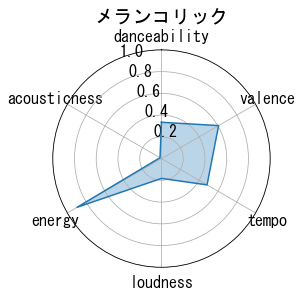

In [214]:
# 楽曲をリコメンドする関数
def music_recommend2(ans):# 解答を引数とする
    data=['name', 'artist', 'release_date', 'length', 'popularity', 'danceability', 'acousticness', 'energy', 'loudness', 'tempo',  'valence']
    if ans[0]==1:
        df3 = pd.read_csv('spotify_data_JP_famous.csv')
        df3 = df3[data]
    else:
        df3 = pd.read_csv('spotify_data_vocaloid_mm.csv') # 正規化したデータ
        df3 = df3[data]
         
    min_point=10000
    for i in range(len(df3)):
        point=0
        cnt=len(df3)/5
        for j in range(len(ans)-1):
            if ans[j+1]==5:
                point+=random.uniform(0, 1)
            else:
                df3_sort=df3.sort_values(by=data[j+5], ascending=True)
                rand=random.uniform(df3_sort.values[int(ans[j+1]*cnt)][j+5], df3_sort.values[int((ans[j+1]+1)*cnt)-1][j+5])
                point+=pow(df3.values[i][j+5]-rand,2)
        if point<min_point:
            min_point_name=df3.values[i][0]
            min_point=point
            min_i=i
            
    print("あなたにおすすめの曲は", min_point_name, "です。")
    min_values=[]
    for k in range(len(ans)-1):
        min_values.append(df3.values[min_i][k+5]) 
    min_name=df3.values[min_i][0]
    circle(min_values, min_name)
    
ans=[]
print("最新の日本の週間トップソング(1番)とボカロ100選(2番)どっちがいいですか?")
ans.append(int(input()))
print("踊れる曲かどうか(弱め(0)-やや弱め(1)-普通(2)-やや強め(3)-強め(4)-指定なし(5))")
ans.append(int(input()))
print("アコースティック感(弱め(0)-やや弱め(1)-普通(2)-やや強め(3)-強め(4)-指定なし(5))")
ans.append(int(input()))
print("エネルギッシュさ(弱め(0)-やや弱め(1)-普通(2)-やや強め(3)-強め(4)-指定なし(5))")
ans.append(int(input()))
print("音量・音圧(弱め(0)-やや弱め(1)-普通(2)-やや強め(3)-強め(4)-指定なし(5))")
ans.append(int(input()))
print("テンポは?(遅め(0)-やや遅め(1)-普通(2)-やや早め(3)-早め(4)-指定なし(5))")
ans.append(int(input()))
print("悲観的か楽観的か(悲観的(0)-やや悲観的(1)-普通(2)-やや楽観的(3)-楽観的(4)-指定なし(5))")
ans.append(int(input()))

# レコメンド
music_recommend2(ans)

# フィードバック
feedback=0
while feedback==0:
    print('満足できたか?(No(0), Yes(1))')
    feedback=int(input())
    if feedback==0:
        music_recommend2(ans)
        
print("Thank you")

・Next action
グラフを書いてみる(レーダーチャート)

In [125]:
df2_mm_sort=df2_mm.sort_values(by='danceability', ascending=True)

In [133]:
import random
print(random.uniform(df2_mm_sort.values[0][5], df2_mm_sort.values[33][5]))
print(random.uniform(df2_mm_sort.values[0][5], df2_mm_sort.values[33][5]))

0.09804239799144239
0.32018542653367765


In [211]:
def circle(values, name): # valuesは各値を入れたリスト
    #フォントの設定
    plt.rcParams['font.size'] = 16
    plt.rcParams['font.family'] = 'MS Gothic'

    #ラベルの設定
    subjectNames = ['danceability', 'acousticness', 'energy', 'loudness', 'tempo', 'valence']
    #角度の設定
    angles = np.linspace(0, 2 * np.pi, len(subjectNames) + 1)

    #データの設定
    scores = np.array(values)
    values = np.concatenate([scores, [scores[0]]])

    #グラフの描画
    fig = plt.figure()
    ax = fig.add_subplot(111, polar = True)

    #塗りつぶし
    ax.fill(angles, values, alpha=0.3)

    # 項目ラベルの表示
    ax.set_rlim(0, 1)

    #θ軸ラベルの設定(弧度法)
    labels = [f'{subjectNames[i]}' for i in range(0, len(subjectNames))]
    ax.set_thetagrids(np.degrees(angles[:-1]), labels)

    ax.set_theta_zero_location("N")#0度が上に来るようにする

    #タイトル
    ax.set_title(name)

    #描画
    ax.plot(angles, values)

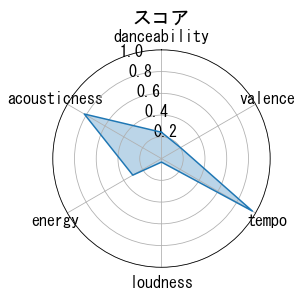

In [207]:
#フォントの設定
plt.rcParams['font.size'] = 16
plt.rcParams['font.family'] = 'MS Gothic'

#ラベルの設定
subjectNames = ['danceability', 'acousticness', 'energy', 'loudness', 'tempo', 'valence']
#角度の設定
angles = np.linspace(0, 2 * np.pi, len(subjectNames) + 1)

#データの設定
scores = np.array([0.2421528972909695, 0.819672131147541, 0.3044982698961938, 0.0323944353487514, 0.965087281795511, 0.2018079852682681])
values = np.concatenate([scores, [scores[0]]])

#グラフの描画
fig = plt.figure()
ax = fig.add_subplot(111, polar = True)

#塗りつぶし
ax.fill(angles, values, alpha=0.3)

# 項目ラベルの表示
ax.set_rlim(0, 1)

#θ軸ラベルの設定(弧度法)
labels = [f'{subjectNames[i]}' for i in range(0, len(subjectNames))]
ax.set_thetagrids(np.degrees(angles[:-1]), labels)
ax.set_theta_zero_location("N")#0度が上に来るようにする

#タイトル
ax.set_title("スコア")

#描画
ax.plot(angles, values)